# Predict Customer Turnover

# Understanding the problem

# Gather Data

In [1]:
 #import all the necessary modules/libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data from the file
df = pd.read_csv("customer_churn_data.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['SeniorCitizen', 'tenure'], dtype='object'),
 dtype('float64'): Index(['MonthlyCharges'], dtype='object'),
 dtype('O'): Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
        'Churn'],
       dtype='object')}

In [6]:
#df.describe() -- only for numerical values
df.describe(include=object) #includes categorical values as well

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3023-GFLBR,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# plt.figure(figsize=(8,6),dpi=100)
# sns.histplot(df.SeniorCitizen,stat='TechSupport')
# plt.show()

In [9]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in c:\users\jasmine jena\anaconda3\lib\site-packages (0.12.2)


In [10]:
#df.isna().any()
df.isna().any().sum()

0

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')
#df['TotalCharges'] = df['TotalCharges'].astype("float") # throws error "couldn't convert string to float"

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

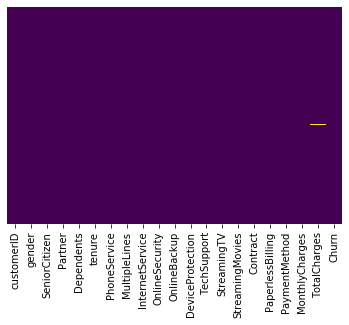

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
percent_missing=df.isnull().sum()*100/len(df)
percent_missing

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [17]:
missing_perct_df=pd.DataFrame({"col_name":df.columns,"% missing":percent_missing})
# missing_perct_df.head(11)
missing_perct_df.sort_values(by="% missing",ascending=False)

,col_name,% missing
TotalCharges,TotalCharges,0.156183
customerID,customerID,0.000000
DeviceProtection,DeviceProtection,0.000000
MonthlyCharges,MonthlyCharges,0.000000
PaymentMethod,PaymentMethod,0.000000
PaperlessBilling,PaperlessBilling,0.000000
Contract,Contract,0.000000
StreamingMovies,StreamingMovies,0.000000
StreamingTV,StreamingTV,0.000000
TechSupport,TechSupport,0.000000


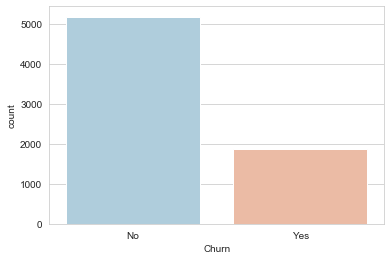

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=df,palette='RdBu_r')

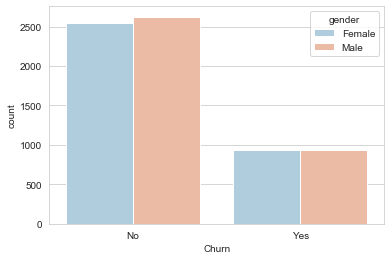

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df,palette='RdBu_r')

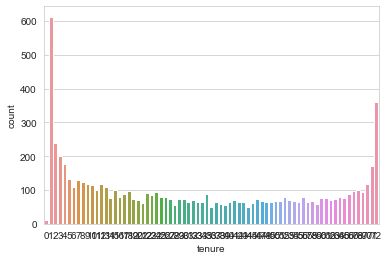

In [20]:
sns.countplot(x='tenure',data=df)

In [21]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [22]:
# findind about multicollinearity
correlation_matrix = df.corr()
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [23]:
#fill the nan values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [24]:
#df['Churn'].nunique() -- to give number of unique values in the given column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [25]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

# I. Data Preprocessing

# 1. Extract Target and Predictor Variable

In [26]:
x =  df.loc[:,df.columns != 'Churn']

In [27]:
x.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [59]:
#check for multicollinearity between independent variables using VIF method
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x_train.shape[1])]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [28]:
import numpy as np

# Assuming 'df' contains the features you want to check for multicollinearity
correlation_matrix = df.corr()
eigenvalues, _ = np.linalg.eig(correlation_matrix)
eigenvalues

array([2.20772869, 1.05469184, 0.67668075, 0.06089873])

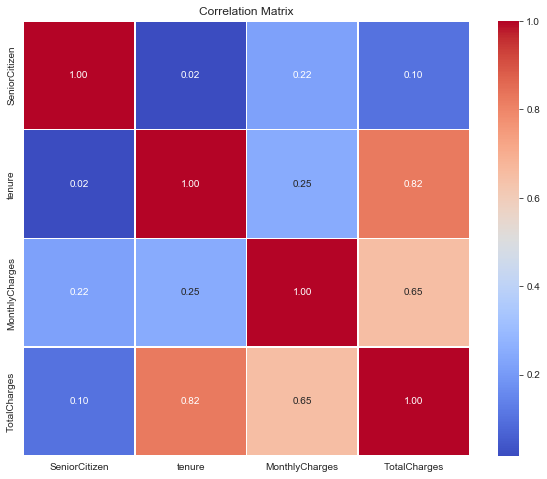

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [30]:
#y= df.loc[:,df.columns == 'Churn'] -- for type dataframe

#for type series
y= df.loc[:,'Churn']

In [31]:
#y.head(5)
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [32]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

# 2. Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train.shape

(4930, 20)

In [34]:
y_train.shape

(4930,)

In [35]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4382,2277-VWCNI,Female,1,No,No,4,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,48.75,179.85
5714,6108-OQZDQ,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.95,384.50
6248,6549-BTYPG,Female,0,Yes,No,60,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.80,3603.45
2298,6670-MFRPK,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Two year,Yes,Credit card (automatic),79.20,5420.65
6993,6583-QGCSI,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35


In [41]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [37]:
y_train.head()

4382     No
5714    Yes
6248     No
2298     No
6993    Yes
Name: Churn, dtype: object

In [38]:
x_test.shape

(2113, 20)

In [39]:
x_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4382,2277-VWCNI,Female,1,No,No,4,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,48.75,179.85
5714,6108-OQZDQ,Female,0,Yes,Yes,4,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,97.95,384.50
6248,6549-BTYPG,Female,0,Yes,No,60,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.80,3603.45
2298,6670-MFRPK,Male,0,Yes,Yes,69,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Two year,Yes,Credit card (automatic),79.20,5420.65
6993,6583-QGCSI,Female,1,Yes,No,50,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,88.05,4367.35


In [40]:
#drop the customerid
x_train = x_train.drop(columns='customerID')
x_test = x_test.drop(columns='customerID')

# Standardization(For numerical) and One Hot Encoding(For categorical)

In [42]:
###Didn't work

#Standardization and OHE should be done after the train test split, and only on the training data since conceptually testing data doesn't exist

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

ohe=OneHotEncoder(sparse=False)
scaler = MinMaxScaler()
ct=make_column_transformer((ohe,['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']),
                      (scaler,  ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']),remainder='passthrough')
x_train_st=ct.fit_transform(x_train)
print(x_train_st)

[[1.         0.         1.         ... 0.05555556 0.30274314 0.0186157 ]
 [1.         0.         0.         ... 0.05555556 0.79351621 0.0422711 ]
 [1.         0.         0.         ... 0.83333333 0.42294264 0.41434813]
 ...
 [1.         0.         0.         ... 0.73611111 0.55561097 0.44099153]
 [1.         0.         1.         ... 0.02777778 0.57256858 0.01640794]
 [0.         1.         0.         ... 0.95833333 0.07581047 0.20548935]]


In [58]:
###Didn't work
# update : I understand the issue, after the ohe, it has added new columns to separate the categorical columns
column_names = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# Convert the NumPy array to a DataFrame
x_train_fin = pd.DataFrame(x_train_st, columns=column_names)
df_transformed.reset_index(drop=True, inplace=True)
x_train_fin

ValueError: Shape of passed values is (4930, 45), indices imply (4930, 19)

Standardization -  for numerical values

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

# Apply standardization only to numerical columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        # Leave the categorical columns unchanged
        ('cat', 'passthrough', categorical_columns)
    ],
    remainder='drop'  # Drop any columns not specified (if any)
)

# Fit and transform the data
transformed_data_train = preprocessor.fit_transform(x_train)
transformed_data_test = preprocessor.fit_transform(x_test)

# Convert the transformed data back to a DataFrame
# Assuming you have the column names of the transformed numerical data
# Replace 'numerical_columns' with the appropriate column names
transformed_df_train = pd.DataFrame(transformed_data_train, columns=numerical_columns + categorical_columns)
transformed_df_test = pd.DataFrame(transformed_data_test, columns=numerical_columns + categorical_columns)
transformed_df_train



###please referto screenshots for insight on error

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,2.27042,-1.15543,-0.538184,-0.931251,Female,No,No,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check
1,-0.440447,-1.15543,1.10639,-0.840756,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,-0.440447,1.13255,-0.135397,0.58265,Female,Yes,No,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3,-0.440447,1.50026,0.479647,1.38621,Male,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Two year,Yes,Credit card (automatic)
4,2.27042,0.723977,0.77547,0.920443,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.440447,-0.338299,-1.50253,-0.774869,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
4926,-0.440447,-1.19629,-1.52927,-0.987786,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4927,-0.440447,0.846548,0.309173,0.684576,Female,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,No,Bank transfer (automatic)
4928,-0.440447,-1.23715,0.365998,-0.939697,Female,No,No,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check


In [44]:
transformed_df_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,2.27958,-1.19545,0.408286,-0.897451,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
1,-0.438677,-0.952997,0.383683,-0.700728,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,-0.438677,-0.912588,0.678929,-0.62573,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check
3,-0.438677,0.905837,-0.254378,0.367236,Female,Yes,No,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check
4,-0.438677,0.946246,0.798668,1.18385,Female,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,One year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,-0.438677,1.22911,1.48594,2.07923,Female,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic)
2109,-0.438677,-0.104399,0.831473,0.196121,Male,No,No,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic)
2110,-0.438677,-1.27627,0.413207,-0.968115,Female,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
2111,-0.438677,0.420924,0.349237,0.429848,Female,Yes,Yes,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic)


One Hot Encoding -  for transformation of categorical values

In [45]:
# Apply OHE only to numerical columns
df_encoded_train = pd.get_dummies(transformed_df_train, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
df_encoded_test = pd.get_dummies(transformed_df_test, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

df_encoded_train


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.27042,-1.15543,-0.538184,-0.931251,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,-0.440447,-1.15543,1.10639,-0.840756,1,0,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2,-0.440447,1.13255,-0.135397,0.58265,1,0,0,1,1,0,...,1,0,0,1,1,0,0,1,0,0
3,-0.440447,1.50026,0.479647,1.38621,0,1,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
4,2.27042,0.723977,0.77547,0.920443,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.440447,-0.338299,-1.50253,-0.774869,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4926,-0.440447,-1.19629,-1.52927,-0.987786,1,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,1
4927,-0.440447,0.846548,0.309173,0.684576,1,0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,0
4928,-0.440447,-1.23715,0.365998,-0.939697,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [46]:
df_encoded_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.27958,-1.19545,0.408286,-0.897451,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,-0.438677,-0.952997,0.383683,-0.700728,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,-0.438677,-0.912588,0.678929,-0.62573,0,1,0,1,1,0,...,1,1,0,0,0,1,0,0,1,0
3,-0.438677,0.905837,-0.254378,0.367236,1,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1
4,-0.438677,0.946246,0.798668,1.18385,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,-0.438677,1.22911,1.48594,2.07923,1,0,1,0,1,0,...,1,1,0,0,0,1,0,1,0,0
2109,-0.438677,-0.104399,0.831473,0.196121,0,1,1,0,1,0,...,1,1,0,0,0,1,0,1,0,0
2110,-0.438677,-1.27627,0.413207,-0.968115,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2111,-0.438677,0.420924,0.349237,0.429848,1,0,0,1,0,1,...,1,0,0,1,1,0,1,0,0,0


In [47]:
y_test

5098    Yes
5159     No
639     Yes
1275     No
3948     No
       ... 
1524     No
228      No
2464    Yes
2738     No
6962    Yes
Name: Churn, Length: 2113, dtype: object

# Model Selection

For this classification problem, I will asses multiple classification models that includes Logistic Regression, Naive Bayes, Support Vector Machine and KNN

# 1. Building a Logistic Regression model

Training and Predicting

In [48]:
#import the model from sklearn
from sklearn.linear_model import LogisticRegression

#initialize
logmodel = LogisticRegression()

#train
logmodel.fit(df_encoded_train,y_train)

#predict
predictions = logmodel.predict(df_encoded_test)

In [49]:
predictions[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

In [50]:
predictions.shape

(2113,)

In [51]:
df_encoded_train.shape

(4930, 45)

# Evaluation

In [52]:
df_encoded_test.shape

(2113, 45)

In [53]:
x_test.shape

(2113, 19)

In [54]:
#We can use precision,recall,f1-score using classification report

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [56]:
results = confusion_matrix(y_test, predictions)
results

array([[1397,  170],
       [ 246,  300]], dtype=int64)

In [57]:
accuracy_score(y_test, predictions)

0.8031235210601041

In [58]:
y_test[:10]

5098    Yes
5159     No
639     Yes
1275     No
3948     No
394      No
4573     No
3523     No
1005     No
4428    Yes
Name: Churn, dtype: object

In [59]:
predictions[:10]

array(['Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes'],
      dtype=object)

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1567
         Yes       0.64      0.55      0.59       546

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.80      0.80      0.80      2113



AUC-ROC curve for model evaluation

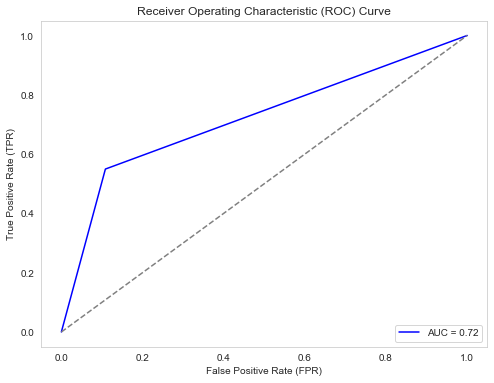

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming you have a trained model called 'model' and test data X_test and y_test with labels 'yes' and 'no'

# Step 1: Map 'yes' to 1 and 'no' to 0 in the y_test
y_test_binary = np.where(y_test == 'Yes', 1, 0)
predictions_binary = np.where(predictions == 'Yes', 1, 0) #this is the addition that I did, before this line it showed "unsupported operand type(s) for -: 'str' and 'str'" because while y_test was converted to int but the values in predictions were still string type

# Step 2: Predict probabilities of the positive class (labeled as 1)
y_prob = logmodel.predict_proba(df_encoded_test)[:, 1]

# Step 3: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)

# Step 4: Calculate AUC score
auc_score = roc_auc_score(y_test_binary, predictions_binary)

# Step 5: Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Let's

drop the totalcharges column since its indicating alarming level of multicollinearity and see how it affects the accuracy, if the accuracy improves, then we will use that data for the further models

In [62]:
df_encoded_train_new = df_encoded_train.drop(columns='TotalCharges')
df_encoded_test_new = df_encoded_test.drop(columns='TotalCharges')

In [63]:
df_encoded_train_new.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,2.27042,-1.15543,-0.538184,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,-0.440447,-1.15543,1.10639,1,0,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
2,-0.440447,1.13255,-0.135397,1,0,0,1,1,0,1,...,1,0,0,1,1,0,0,1,0,0
3,-0.440447,1.50026,0.479647,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,2.27042,0.723977,0.77547,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [74]:
df_encoded_test_new.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.432526,1.09818,-0.344369,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,1,0,0
1,-0.432526,-1.23003,-0.996602,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
2,-0.432526,-0.290579,0.581164,0,1,1,0,1,0,0,...,1,1,0,0,1,0,1,0,0,0
3,-0.432526,-0.862421,1.26022,1,0,0,1,1,0,0,...,1,1,0,0,0,1,0,0,1,0
4,2.312,-0.208888,1.33735,1,0,0,1,1,0,0,...,1,1,0,0,0,1,1,0,0,0


In [65]:
logmodel_new = LogisticRegression()

#train
logmodel_new.fit(df_encoded_train_new,y_train)

#predict
predictions_new = logmodel_new.predict(df_encoded_test_new)

In [66]:
predictions_new[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype=object)

In [67]:
results_new = confusion_matrix(y_test, predictions_new)
results_new

array([[1394,  173],
       [ 249,  297]], dtype=int64)

In [68]:
accuracy_score(y_test,predictions_new)

0.8002839564600095

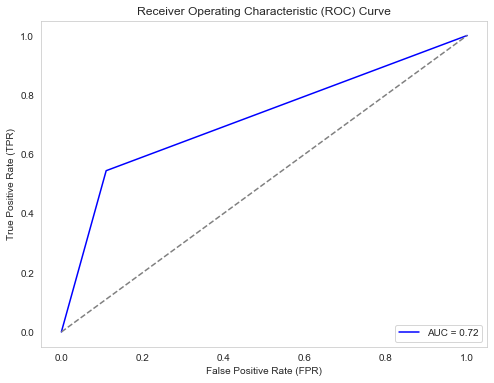

In [69]:
y_test_binary = np.where(y_test == 'Yes', 1, 0)
predictions_binary = np.where(predictions_new == 'Yes', 1, 0) #this is the addition that I did, before this line it showed "unsupported operand type(s) for -: 'str' and 'str'" because while y_test was converted to int but the values in predictions were still string type

# Step 2: Predict probabilities of the positive class (labeled as 1)
y_prob = logmodel_new.predict_proba(df_encoded_test_new)[:, 1]

# Step 3: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)

# Step 4: Calculate AUC score
auc_score = roc_auc_score(y_test_binary, predictions_binary)

# Step 5: Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

As you see, the accuracy infact decreases, so we won't drop the totalcharges column

# 2. Building a KNN Model

Let's first see k=1 and apply it manually, afterwards we will use elbow method to choose the best value for k

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=1)

In [72]:
knn.fit(df_encoded_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [73]:
y_pred = knn.predict(df_encoded_test)

In [74]:
y_pred[:5]

array(['Yes', 'No', 'Yes', 'No', 'No'], dtype=object)

# Precitions and Evaluations

In [75]:
print(confusion_matrix(y_test,y_pred))

[[1261  306]
 [ 270  276]]


In [76]:
print(accuracy_score(y_test,y_pred))

0.7274017983909133


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1567
         Yes       0.47      0.51      0.49       546

    accuracy                           0.73      2113
   macro avg       0.65      0.66      0.65      2113
weighted avg       0.73      0.73      0.73      2113



From k=1, we get relatively low accuracy, let's apply Elbow Method

In [78]:
error_rate=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(df_encoded_train,y_train)
    pred_i = knn.predict(df_encoded_test)
    error_rate.append(np.mean(pred_i != y_test))

In [79]:
#print(pred_i != y_test)
print(error_rate)

[0.2725982016090866, 0.2342640795078088, 0.2503549455750118, 0.22669190724088972, 0.23615712257453858, 0.21864647420728822, 0.21864647420728822, 0.22006625650733555, 0.2129673450070989, 0.22006625650733555, 0.2195929957406531, 0.21533364884051112, 0.21107430194036914, 0.20539517274017985, 0.20823473734027448, 0.2049219119734974, 0.20776147657359204, 0.2058684335068623, 0.2096545196403218, 0.20823473734027448, 0.2106010411736867, 0.20870799810695692, 0.20918125887363936, 0.2096545196403218, 0.21154756270705158, 0.21107430194036914, 0.21202082347373402, 0.20776147657359204, 0.2106010411736867, 0.20681495504022718, 0.20918125887363936, 0.20870799810695692, 0.2096545196403218, 0.20728821580690962, 0.20728821580690962, 0.21012778040700425, 0.21202082347373402, 0.20539517274017985, 0.2096545196403218, 0.20918125887363936, 0.20870799810695692, 0.21249408424041646, 0.21107430194036914, 0.21012778040700425, 0.2106010411736867, 0.20918125887363936, 0.21107430194036914, 0.20918125887363936, 0.210

Text(0, 0.5, 'Error Rate')

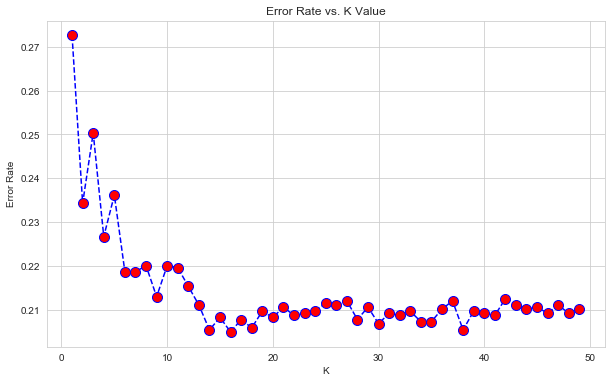

In [80]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

We will take k=10 and proceed thereafter

In [81]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(df_encoded_train,y_train)
pred = knn.predict(df_encoded_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=10


[[1380  187]
 [ 278  268]]


              precision    recall  f1-score   support

          No       0.83      0.88      0.86      1567
         Yes       0.59      0.49      0.54       546

    accuracy                           0.78      2113
   macro avg       0.71      0.69      0.70      2113
weighted avg       0.77      0.78      0.77      2113

0.7799337434926644


In [83]:
#with k=13
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(df_encoded_train,y_train)
pred = knn.predict(df_encoded_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

WITH K=10


[[1366  201]
 [ 233  313]]


              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1567
         Yes       0.61      0.57      0.59       546

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113

0.7946048272598202


We notice that KNN is not working as good as Logistic Regression because KNN is better used for lower dimensional data

# 3. Building Naive Bayes Classifier

In [84]:
#training the NB model on training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(df_encoded_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
#predicting the test set results
y_pred = classifier.predict(df_encoded_test)

In [86]:
print(confusion_matrix(y_test,y_pred))

[[1012  555]
 [  85  461]]


In [87]:
print(accuracy_score(y_test,y_pred))

0.6971131093232371


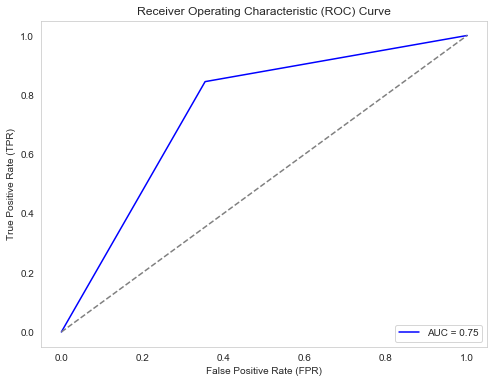

In [88]:
# Step 1: Map 'yes' to 1 and 'no' to 0 in the y_test
y_test_binary = np.where(y_test == 'Yes', 1, 0)
predictions_binary = np.where(y_pred == 'Yes', 1, 0) #this is the addition that I did, before this line it showed "unsupported operand type(s) for -: 'str' and 'str'" because while y_test was converted to int but the values in predictions were still string type

# Step 2: Predict probabilities of the positive class (labeled as 1)
y_prob = classifier.predict_proba(df_encoded_test)[:, 1]

# Step 3: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)

# Step 4: Calculate AUC score
auc_score = roc_auc_score(y_test_binary, predictions_binary)

# Step 5: Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Well, not satisfactory

# 4.Building SVM Model

In [89]:
from sklearn.svm import SVC

In [90]:
model = SVC(kernel="rbf") #by default kernel="rbf"
model.fit(df_encoded_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Predictions and Evaluation

In [91]:
y_pred = model.predict(df_encoded_test)

In [92]:
print(confusion_matrix(y_test,y_pred))

[[1424  143]
 [ 272  274]]


In [93]:
print(accuracy_score(y_test,y_pred))

0.8035967818267865


In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.84      0.91      0.87      1567
         Yes       0.66      0.50      0.57       546

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



So, we tried kernel = rbf and linear, and with rbf it gives highest accuracy

# Model Evaluation

# Cross-validation : model selection

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [100]:
x_lol = x.drop(columns='TotalCharges')
x_lol = x_lol.drop(columns='customerID')

In [101]:
x_lol

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40


In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
numerical_columns = ['SeniorCitizen','tenure','MonthlyCharges']
categorical_columns = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

# Apply standardization only to numerical columns
numerical_transformer = StandardScaler()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        # Leave the categorical columns unchanged
        ('cat', 'passthrough', categorical_columns)
    ],
    remainder='drop'  # Drop any columns not specified (if any)
)

# Fit and transform the data
x_cv = preprocessor.fit_transform(x_lol)


# Convert the transformed data back to a DataFrame
# Assuming you have the column names of the transformed numerical data
# Replace 'numerical_columns' with the appropriate column names
xcv_fin = pd.DataFrame(x_cv, columns=numerical_columns + categorical_columns)


In [103]:
xcv_fin.head()

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.439916,-1.27744,-1.16032,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,-0.439916,0.0663274,-0.259629,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,-0.439916,-1.23672,-0.36266,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,-0.439916,0.514251,-0.746535,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,-0.439916,-1.23672,0.197365,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [104]:
x_fin = pd.get_dummies(xcv_fin, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])

In [105]:
x_fin.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.27744,-1.16032,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,-0.439916,0.0663274,-0.259629,0,1,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,-0.439916,-1.23672,-0.36266,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,-0.439916,0.514251,-0.746535,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,-0.439916,-1.23672,0.197365,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [139]:
#crossvalidation for knn

knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn,x_fin,y,cv=10, scoring='accuracy').mean())

0.7905693907156672


In [141]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, x_fin, y, cv=10, scoring='accuracy').mean())

0.8012203820116055


In [142]:
#svc
classifier = SVC()
print(cross_val_score(classifier, x_fin, y, cv=10, scoring='accuracy').mean())

0.8002272727272729


For KNN model finding optimal value of k

In [107]:
k_range = list(range(1,31))
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_fin, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7175844213410703, 0.7515234123146357, 0.7527987991618311, 0.7712594696969697, 0.7694138862024501, 0.7760882092198581, 0.7699804561573178, 0.7758012975499678, 0.7736708172147002, 0.782760718891038, 0.7792091795615732, 0.7824756205673759, 0.7821925370728563, 0.7874466070277241, 0.7824770309477758, 0.7890083010960671, 0.7861657801418438, 0.7917043439716311, 0.7853155222437137, 0.7905693907156672, 0.7853155222437137, 0.7884393133462282, 0.7857410541586074, 0.7890066892327531, 0.7877284816247583, 0.7900012088974855, 0.7870196647324306, 0.7911373710509348, 0.7897175209542231, 0.7905710025789814]


In [108]:
print(np.mean(k_scores))

0.7794041209972062


Text(0, 0.5, 'Cross-Validated Accuracy')

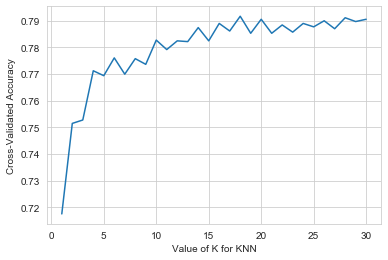

In [109]:
#plot the value for accuracy cross-validated corresponding to k
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Using GridSearchCV for Hyper-Parameter Tuning

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
#define the parameter values that should be searched
k_range = list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [112]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [113]:
#intantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [114]:
#fit the grid with data
grid.fit(x_fin,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [115]:
grid.cv_results_

{'mean_fit_time': array([0.08003292, 0.07896688, 0.08254459, 0.08136265, 0.07984457,
        0.07814302, 0.07876518, 0.08260243, 0.08620505, 0.08698449,
        0.07866645, 0.08237281, 0.07953722, 0.07849903, 0.08056722,
        0.07988369, 0.08345375, 0.07901158, 0.07840257, 0.07846558,
        0.082741  , 0.08083367, 0.07963943, 0.08293228, 0.08659692,
        0.08340993, 0.08495123, 0.08450747, 0.0806927 , 0.08629105]),
 'std_fit_time': array([0.00336022, 0.00197652, 0.00247753, 0.00359447, 0.00333225,
        0.00161755, 0.00144101, 0.0055695 , 0.00438774, 0.01212738,
        0.00148494, 0.00649765, 0.00158311, 0.00109949, 0.00204741,
        0.00214797, 0.00539426, 0.0014662 , 0.0010679 , 0.00076922,
        0.00845036, 0.00214035, 0.00230694, 0.00837737, 0.00707548,
        0.00624559, 0.01130626, 0.00531773, 0.00458709, 0.00769894]),
 'mean_score_time': array([0.08430679, 0.09908266, 0.11296508, 0.11373453, 0.11786792,
        0.1196846 , 0.12158713, 0.14047737, 0.1406095 , 0.14

In [116]:
#view results as pandas dataframe
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.717584,{'n_neighbors': 1}
1,0.751523,{'n_neighbors': 2}
2,0.752799,{'n_neighbors': 3}
3,0.771259,{'n_neighbors': 4}
4,0.769414,{'n_neighbors': 5}
5,0.776088,{'n_neighbors': 6}
6,0.769980,{'n_neighbors': 7}
7,0.775801,{'n_neighbors': 8}
8,0.773671,{'n_neighbors': 9}
9,0.782761,{'n_neighbors': 10}


In [117]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)


0.7917043439716311
{'n_neighbors': 18}


Using GridSearchCV and RandomSearchCV on logistic regression model

In [118]:
#Define the hyperparameter grid to search over:

param_grid = {
    'C': [0.1, 1.0, 10.0],  # regularization strength
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']  # optimization algorithms
}


In [119]:
param_grid

{'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

In [120]:
#Create an instance of the Logistic Regression model:
logmodel = LogisticRegression()


In [128]:
#Create the GridSearchCV object and fit it with your data:
grid = GridSearchCV(estimator=logmodel, param_grid=param_grid, cv=5)
grid.fit(df_encoded_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1.0, 10.0],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [129]:
best_params = grid.best_params_
best_model = grid.best_estimator_

In [130]:
best_params
best_model

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.801826,"{'C': 0.1, 'solver': 'liblinear'}"
1,0.802028,"{'C': 0.1, 'solver': 'lbfgs'}"
2,0.802028,"{'C': 0.1, 'solver': 'sag'}"
3,0.802028,"{'C': 0.1, 'solver': 'saga'}"
4,0.802840,"{'C': 1.0, 'solver': 'liblinear'}"
5,0.802434,"{'C': 1.0, 'solver': 'lbfgs'}"
6,0.802434,"{'C': 1.0, 'solver': 'sag'}"
7,0.802637,"{'C': 1.0, 'solver': 'saga'}"
8,0.802840,"{'C': 10.0, 'solver': 'liblinear'}"
9,0.803043,"{'C': 10.0, 'solver': 'lbfgs'}"


In [132]:
print(grid.best_score_)

0.8030425963488843


In [133]:
y_pred = best_model.predict(df_encoded_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.8035967818267865
